In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import Functions.PCA as pca
import Functions.data_load as dat
import Functions.visualization as vis
import Functions.average_img as avg
import Functions.k_nearest as knn

#load data
train_array, test_array = dat.load_data()
cleaned_arr = dat.clean_train_arr()
z_arr = pca.z_arr(cleaned_arr)
val_arr = dat.load_val_arr()
precise_val_arr = dat.load_precise_val_arr()
val_arr_index = dat.load_val_arr_index()

In [6]:
val_arr_index_df = pd.read_csv("data/val_array_index.csv", index_col = 0)
val_arr_index = val_arr_index_df.to_numpy()
val_arr_index_df

,1,2,3,4,5,6,7,8,9,10
PCs,,,,,,,,,,
1,23.9,24.6,24.7,24.7,26.1,26.0,26.7,27.0,27.3,27.1
2,37.9,38.4,39.5,40.2,42.7,42.5,42.8,42.3,44.1,43.8
3,42.9,43.5,45.6,45.9,46.6,48.1,47.4,47.5,48.0,48.1
4,53.8,54.8,58.6,58.0,58.6,59.8,59.8,60.0,60.6,61.8
5,66.2,65.9,69.5,70.8,71.0,71.8,72.2,71.9,72.0,72.2
6,76.2,75.9,79.3,80.4,79.7,80.8,80.9,81.8,81.6,81.2
7,81.5,81.6,84.0,84.5,84.3,84.5,84.7,84.8,85.4,84.7
8,86.4,86.4,88.1,88.9,88.3,89.3,88.9,88.4,88.3,88.4
9,87.6,87.5,89.4,89.7,90.1,90.4,90.2,90.2,89.8,90.1


In [2]:
pca.arr_only(z_arr, pca.create_sorted_eigenvec(30))

numpy.ndarray

In [2]:
train_arr_cleaned_df = pd.read_csv("data/pca/cleaned_train_array.csv", header = None)
train_arr_cleaned = train_arr_cleaned_df.to_numpy()

In [11]:
z_array = pca.z_arr(train_arr_cleaned)

df = pd.DataFrame(z_array)
df.to_csv('data/pca/z_array.csv', index=None, header=None)

In [8]:
knn.validation_kNN_train(1000, k=10, PC = 7)

Anzahl richtig erkannter Digits: 847
Anzahl falsch erkannter Digits: 153

Anteil richtiger Vorhersagen: 84.7%


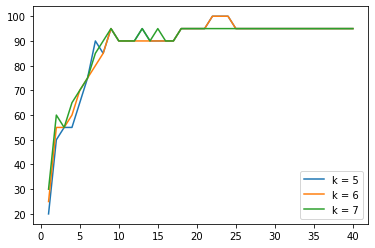

In [27]:
val_arr1[:,0]
PCs = list(range(1, 41))
plt.plot(PCs, val_arr1[:,0], label = "k = 5")
plt.plot(PCs, val_arr1[:,1], label = "k = 6")
plt.plot(PCs, val_arr1[:,2], label = "k = 7")
plt.legend()

In [36]:
#precise array mit validation für PC 27 bis 35, jeweils mit k3/4/5
#0:30 mit 10
#1:15 mit 50
# 21:00 mit 1000
precise_val_arr = np.zeros((9, 3))
for i in range(0, 9):
    for j in range(0, 3):
        precise_val_arr[i, j] = knn.validation_kNN_train_matrix(10000, k=j+3, PC=i+27)

df = pd.DataFrame(precise_val_arr)
df.to_csv('data/precise_val_array.csv', index=None, header=None)

/Users/benjaminwehnert/digitrecognition/2022-topic-01-team-02/Functions/k_nearest.py:22: RuntimeWarning: invalid value encountered in sqrt
  dist_arr =  np.sqrt(img_dot + arr_dot - 2*np.dot(img_reduced, arr_reduced[:, :].T))


In [16]:
def heatmap(arr, row_str, col_str, name = 'variable parts'):
    arr_df = pd.DataFrame(arr, rows=row_str, columns=col_str)
    sb.set(rc={"figure.dpi":200, "figure.figsize":(5, 5)})
    sb.heatmap(arr_df, cmap="viridis", annot=True, annot_kws={"size": 16}, square=True, cbar_kws={"shrink": 0.8})
    plt.title(f'Accuracy with variable {name}', fontsize =9)

In [17]:
heatmap(precise_val_arr, ["27", "28", "29", "30", "31", "32", "33", "34", "35"], ["3", "4", "5"], "PCs and ks")

TypeError: __init__() got an unexpected keyword argument 'rows'

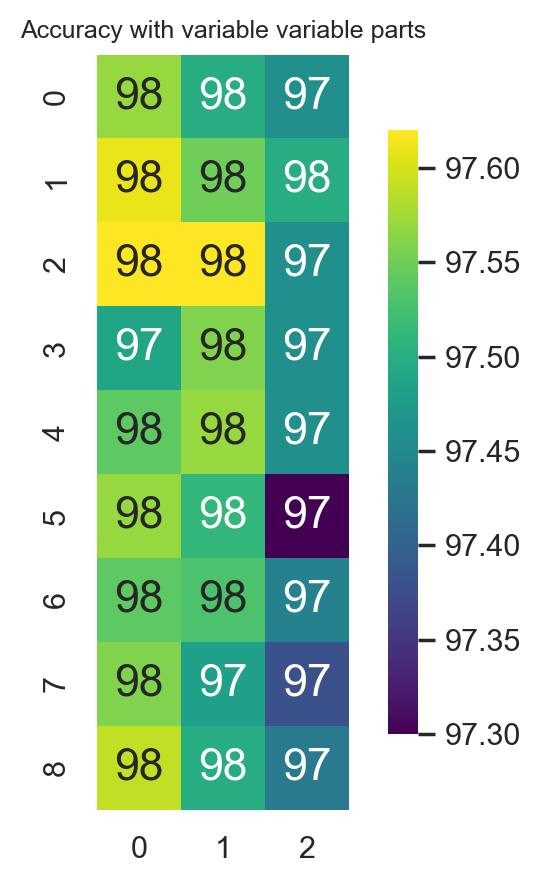

In [5]:

vis.heatmap(precise_val_arr)

In [35]:
val_arr[26:35, 2:5]

array([[97.8, 97.6, 97.5],
       [97.5, 97.5, 97.6],
       [97.6, 97.6, 97.5],
       [97.6, 97.7, 97.6],
       [97.3, 97.3, 97.3],
       [97.4, 97.3, 97.2],
       [97.4, 97.5, 97.6],
       [97.5, 97.5, 97.6],
       [97.9, 97.7, 97.6]])

In [4]:
if val_arr[26:35, 2:5] == precise_val_arr:
    print("True")

array([[100., 100., 100., 100.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100., 100., 100.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100., 100., 100.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [100., 100.,  90.,  90.,  90.,  90.,  90.,  90.,  90.,  90.]])

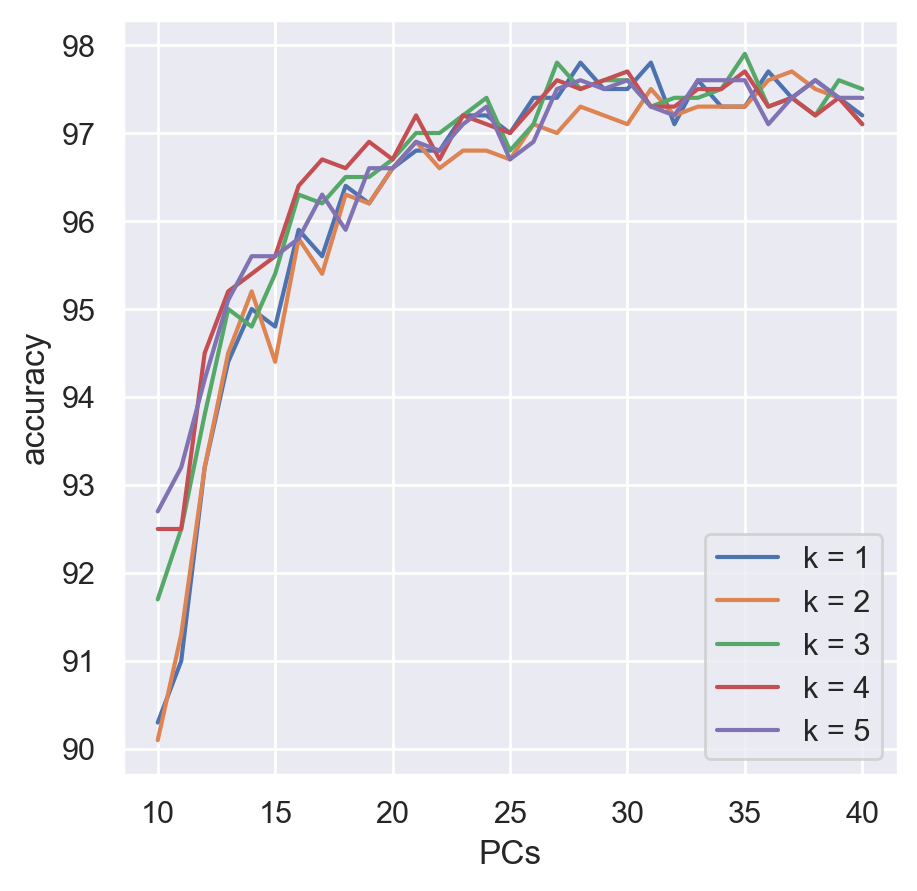

In [9]:
PCs = list(range(10, 41))
for i in range(0,5):
    plt.plot(PCs, val_arr[9:40 ,i], label = f"k = {i+1}")
    plt.xlabel('PCs')
    plt.ylabel('accuracy')
plt.legend()

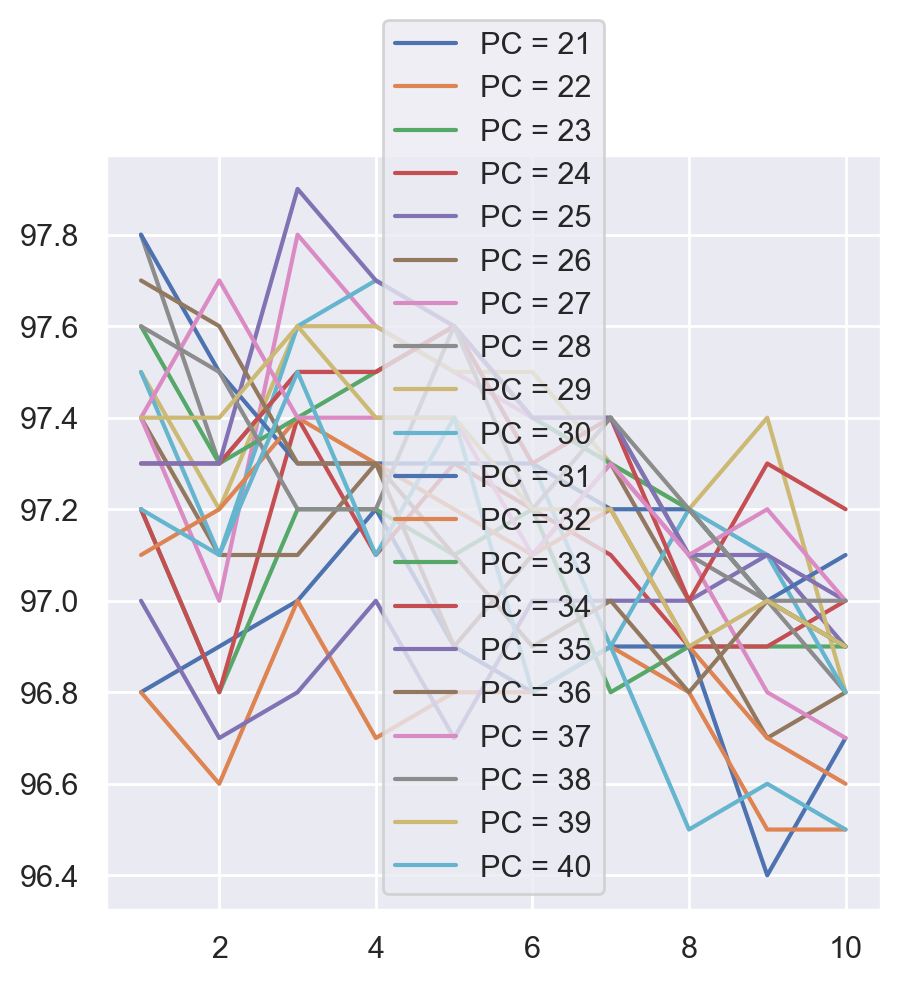

In [25]:
k = list(range(1, 11))
for i in range(20,40):
    plt.plot(k, val_arr[i ,0:10], label = f"PC = {i+1}")
plt.legend()

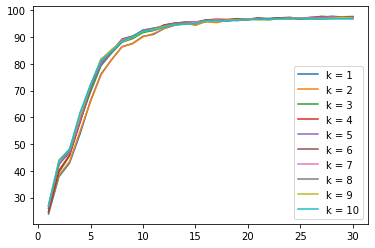

In [8]:
PCs = list(range(1, 31))
plt.plot(PCs, val_arr[:,0], label = "k = 1")
plt.plot(PCs, val_arr[:,1], label = "k = 2")
plt.plot(PCs, val_arr[:,2], label = "k = 3")
plt.plot(PCs, val_arr[:,3], label = "k = 4")
plt.plot(PCs, val_arr[:,4], label = "k = 5")
plt.plot(PCs, val_arr[:,5], label = "k = 6")
plt.plot(PCs, val_arr[:,6], label = "k = 7")
plt.plot(PCs, val_arr[:,7], label = "k = 8")
plt.plot(PCs, val_arr[:,8], label = "k = 9")
plt.plot(PCs, val_arr[:,9], label = "k = 10")
plt.legend()

In [3]:
val_arr = dat.load_val_arr()
val_arr.shape

(40, 10)

In [ ]:
val_arr_df.set_index('PCs',inplace=True)

In [11]:
PCs = []
for i in range(1, 41):
    PCs.append(i)
PCs

ks = []
for i in range(0,11):
    ks.append(i)

val_arr_df = pd.DataFrame(val_arr)
val_arr_df.insert(0, column='PCs', value = PCs)

val_arr_df.columns = ks
val_arr_df.to_csv('data/val_array_index.csv', index=True, header=True)

In [15]:
val_arr_index_df = pd.read_csv("data/val_array_index.csv")
val_arr_index_df
val_arr_index_df.set_index('PCs',inplace=True)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10
0,0,1,23.9,24.6,24.7,24.7,26.1,26.0,26.7,27.0,27.3,27.1
1,1,2,37.9,38.4,39.5,40.2,42.7,42.5,42.8,42.3,44.1,43.8
2,2,3,42.9,43.5,45.6,45.9,46.6,48.1,47.4,47.5,48.0,48.1
3,3,4,53.8,54.8,58.6,58.0,58.6,59.8,59.8,60.0,60.6,61.8
4,4,5,66.2,65.9,69.5,70.8,71.0,71.8,72.2,71.9,72.0,72.2
5,5,6,76.2,75.9,79.3,80.4,79.7,80.8,80.9,81.8,81.6,81.2
6,6,7,81.5,81.6,84.0,84.5,84.3,84.5,84.7,84.8,85.4,84.7
7,7,8,86.4,86.4,88.1,88.9,88.3,89.3,88.9,88.4,88.3,88.4
8,8,9,87.6,87.5,89.4,89.7,90.1,90.4,90.2,90.2,89.8,90.1
9,9,10,90.3,90.1,91.7,92.5,92.7,92.4,92.3,92.5,92.1,92.2


In [7]:
def heatmap(file_path, name = 'variable parts'):
    val_arr_index = dat.load_val_arr_index()
    val_arr_index.set_index('PCs',inplace=True)
    sb.set(rc={"figure.dpi":200, "figure.figsize":(5, 5)})
    sb.heatmap(arr_df, cmap="viridis", annot=False, annot_kws={"size": 5}, square=True, cbar_kws={"shrink": 0.8})
    plt.title(f'Accuracy with variable {name}', fontsize =9)
    plt.xlabel('k', fontsize = 6)
    plt.ylabel('Principal Components', fontsize = 6)

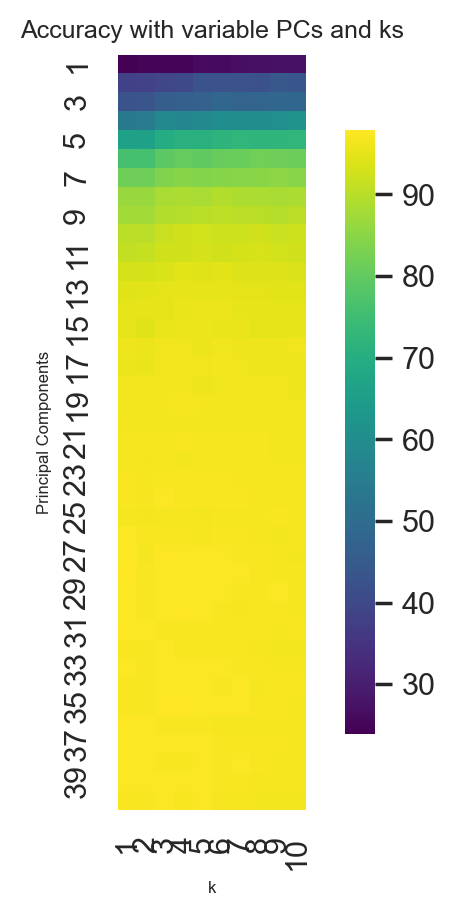

In [9]:
heatmap('data/val_array_index.csv', name = 'PCs and ks')

In [19]:
#1
np.sum(val_arr[26:30, 2:5])/12

97.59166666666665

In [20]:
#2
np.sum(val_arr[32:35, 2:5])/9

97.5888888888889

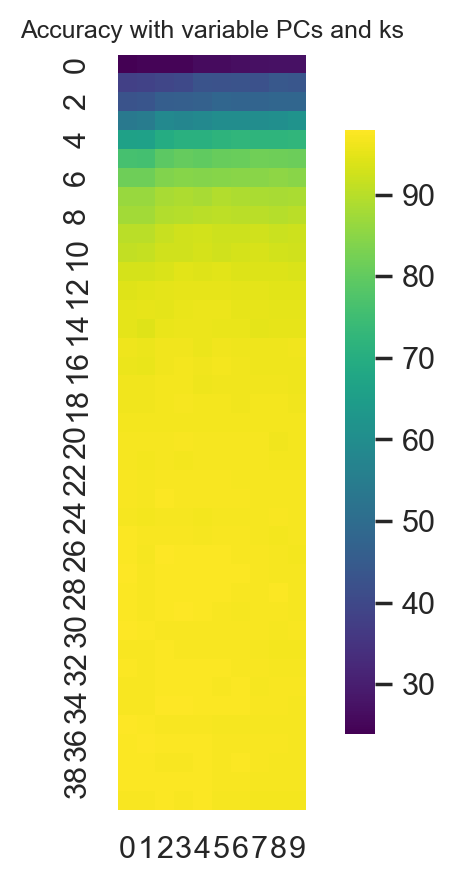

In [3]:
vis.heatmap(val_arr_index[0:40,:], name = 'PCs and ks')